# Human Activity Recognition
https://www.kaggle.com/uciml/human-activity-recognition-with-smartphones  
The Human Activity Recognition database was built from the recordings of 30 study participants performing activities of daily living (ADL) while carrying a waist-mounted smartphone with embedded inertial sensors. The objective is to classify activities into one of the six activities performed.  

### Description of experiment
The experiments have been carried out with a group of 30 volunteers within an age bracket of 19-48 years. Each person performed six activities (WALKING, WALKINGUPSTAIRS, WALKINGDOWNSTAIRS, SITTING, STANDING, LAYING) wearing a smartphone (Samsung Galaxy S II) on the waist. Using its embedded accelerometer and gyroscope, we captured 3-axial linear acceleration and 3-axial angular velocity at a constant rate of 50Hz. The experiments have been video-recorded to label the data manually. The obtained dataset has been randomly partitioned into two sets, where 70% of the volunteers was selected for generating the training data and 30% the test data.

The sensor signals (accelerometer and gyroscope) were pre-processed by applying noise filters and then sampled in fixed-width sliding windows of 2.56 sec and 50% overlap (128 readings/window). The sensor acceleration signal, which has gravitational and body motion components, was separated using a Butterworth low-pass filter into body acceleration and gravity. The gravitational force is assumed to have only low frequency components, therefore a filter with 0.3 Hz cutoff frequency was used. From each window, a vector of features was obtained by calculating variables from the time and frequency domain.

### Attribute information
For each record in the dataset the following is provided:

- Triaxial acceleration from the accelerometer (total acceleration) and the estimated body acceleration.

- Triaxial Angular velocity from the gyroscope.

- A 561-feature vector with time and frequency domain variables.

- Its activity label.

- An identifier of the subject who carried out the experiment.

In [1]:
import pandas as pd
from sklearn.ensemble import *
from sklearn.tree import *
import numpy as np
import matplotlib.pyplot as plt
from sklearn.feature_selection import *
from sklearn.model_selection import train_test_split

from sklearn.naive_bayes import *
from sklearn.svm import *
from sklearn.neighbors import *
from sklearn.tree import *
from sklearn.metrics import *

In [2]:
df = pd.read_csv("train.csv")
df.head()

,tBodyAcc-mean()-X,tBodyAcc-mean()-Y,tBodyAcc-mean()-Z,tBodyAcc-std()-X,tBodyAcc-std()-Y,tBodyAcc-std()-Z,tBodyAcc-mad()-X,tBodyAcc-mad()-Y,tBodyAcc-mad()-Z,tBodyAcc-max()-X,...,fBodyBodyGyroJerkMag-kurtosis(),"angle(tBodyAccMean,gravity)","angle(tBodyAccJerkMean),gravityMean)","angle(tBodyGyroMean,gravityMean)","angle(tBodyGyroJerkMean,gravityMean)","angle(X,gravityMean)","angle(Y,gravityMean)","angle(Z,gravityMean)",subject,Activity
0,0.288585,-0.020294,-0.132905,-0.995279,-0.983111,-0.913526,-0.995112,-0.983185,-0.923527,-0.934724,...,-0.710304,-0.112754,0.030400,-0.464761,-0.018446,-0.841247,0.179941,-0.058627,1,STANDING
1,0.278419,-0.016411,-0.123520,-0.998245,-0.975300,-0.960322,-0.998807,-0.974914,-0.957686,-0.943068,...,-0.861499,0.053477,-0.007435,-0.732626,0.703511,-0.844788,0.180289,-0.054317,1,STANDING
2,0.279653,-0.019467,-0.113462,-0.995380,-0.967187,-0.978944,-0.996520,-0.963668,-0.977469,-0.938692,...,-0.760104,-0.118559,0.177899,0.100699,0.808529,-0.848933,0.180637,-0.049118,1,STANDING
3,0.279174,-0.026201,-0.123283,-0.996091,-0.983403,-0.990675,-0.997099,-0.982750,-0.989302,-0.938692,...,-0.482845,-0.036788,-0.012892,0.640011,-0.485366,-0.848649,0.181935,-0.047663,1,STANDING
4,0.276629,-0.016570,-0.115362,-0.998139,-0.980817,-0.990482,-0.998321,-0.979672,-0.990441,-0.942469,...,-0.699205,0.123320,0.122542,0.693578,-0.615971,-0.847865,0.185151,-0.043892,1,STANDING


### % of Different categories
As the percentage is roughly equal, hence we can consider it to a balanced dataset.

In [3]:
df['Activity'].groupby(df['Activity']).count()

Activity
LAYING                1407
SITTING               1286
STANDING              1374
WALKING               1226
WALKING_DOWNSTAIRS     986
WALKING_UPSTAIRS      1073
Name: Activity, dtype: int64

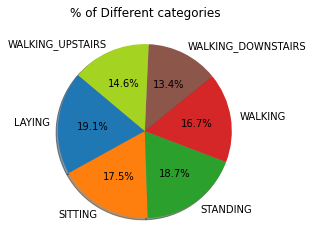

In [4]:
activity = df['Activity'].groupby(df['Activity']).count().index
activity_data = df['Activity'].groupby(df['Activity']).count().values
colors = ["#1f77b4", "#ff7f0e", "#2ca02c", "#d62728", "#8c564b","#a4d321"]
plt.pie(activity_data, labels=activity,  colors=colors , autopct='%1.1f%%', shadow=True, startangle=140)
plt.title("% of Different categories")
plt.show()

### Checking the number of null values

In [5]:
print(df.isna().sum())

tBodyAcc-mean()-X       0
tBodyAcc-mean()-Y       0
tBodyAcc-mean()-Z       0
tBodyAcc-std()-X        0
tBodyAcc-std()-Y        0
                       ..
angle(X,gravityMean)    0
angle(Y,gravityMean)    0
angle(Z,gravityMean)    0
subject                 0
Activity                0
Length: 563, dtype: int64


In [6]:
x = df.drop(['Activity'],axis=1)
y = df['Activity']

### Trying reducing number of features

In [7]:
clf = RandomForestClassifier()
clf.fit(x,y)
features = pd.DataFrame(clf.feature_importances_,index=x.columns).sort_values(by=0)
features.head()

,0
fBodyBodyAccJerkMag-entropy(),0.000042
fBodyBodyGyroJerkMag-min(),0.000066
"fBodyAccJerk-bandsEnergy()-57,64.2",0.000072
"fBodyAcc-bandsEnergy()-49,56",0.000084
"fBodyAccJerk-bandsEnergy()-49,64",0.000085


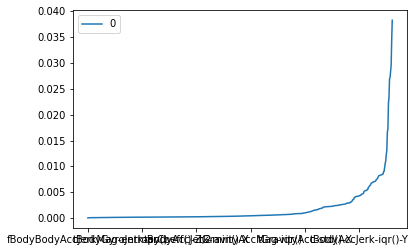

In [8]:
features.plot()

### Chosing important features

In [9]:
features = features.head(400).index.values
features

array(['fBodyBodyAccJerkMag-entropy()', 'fBodyBodyGyroJerkMag-min()',
       'fBodyAccJerk-bandsEnergy()-57,64.2',
       'fBodyAcc-bandsEnergy()-49,56', 'fBodyAccJerk-bandsEnergy()-49,64',
       'fBodyAcc-bandsEnergy()-41,48.2', 'tBodyAccMag-min()',
       'fBodyBodyAccJerkMag-maxInds', 'tBodyAccJerk-arCoeff()-X,3',
       'fBodyAccJerk-entropy()-Y', 'fBodyAcc-bandsEnergy()-33,48.1',
       'tBodyAccMag-arCoeff()4', 'tBodyAccJerkMag-arCoeff()3',
       'fBodyAcc-bandsEnergy()-33,40', 'fBodyAcc-min()-X',
       'tBodyAccJerk-mean()-Z', 'fBodyAcc-bandsEnergy()-57,64.2',
       'fBodyAccJerk-min()-Y', 'fBodyBodyGyroJerkMag-mean()',
       'tBodyAccJerk-arCoeff()-Y,1', 'fBodyAccJerk-bandsEnergy()-57,64',
       'tBodyGyro-arCoeff()-Z,1', 'fBodyAccJerk-min()-Z',
       'angle(tBodyAccJerkMean),gravityMean)', 'fBodyAcc-min()-Y',
       'fBodyAccJerk-bandsEnergy()-41,48', 'tBodyAcc-arCoeff()-Y,3',
       'fBodyAcc-bandsEnergy()-49,64.1', 'tBodyAcc-arCoeff()-Z,2',
       'fBodyGyro-bandsEner

In [10]:
X1 = x.filter(items=features)

### Training models on various classifiers

In [11]:
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 42)
X1_train, X1_test, y1_train, y1_test = train_test_split(X1, y, test_size = 0.2, random_state = 42)

In [12]:
classifiers = [
    KNeighborsClassifier(3),
    SVC(kernel="rbf",probability=True),
    DecisionTreeClassifier(),
    RandomForestClassifier(),
    AdaBoostClassifier(),
    GradientBoostingClassifier(),
    GaussianNB()]

In [13]:
def f_score(X_train, X_test, y_train, y_test):
    for clf in classifiers:
        clf.fit(X_train,y_train)
        y_pred = clf.predict(X_test)
        f = f1_score(y_true=y_test,y_pred=y_pred,average="macro")
        print(f,clf.__class__.__name__)

## F1-Score

Recall = TruePositives / (TruePositives + FalseNegatives)

Precision = TruePositives / (TruePositives + FalsePositives)

F1 = 2 (precision recall) / (precision + recall)

### F1-Score of complete dataset

In [14]:
f_score(X_train, X_test, y_train, y_test)

0.9747635809416267 KNeighborsClassifier
0.9553363569986938 SVC
0.9482979192962379 DecisionTreeClassifier
0.9790716658081605 RandomForestClassifier
0.3711702611702612 AdaBoostClassifier
0.9896137103020436 GradientBoostingClassifier
0.7352013646643126 GaussianNB


### F1-Score of selected features

In [15]:
f_score(X1_train, X1_test, y1_train, y1_test)

0.9206410444189652 KNeighborsClassifier
0.8393929034713912 SVC
0.7947165947557632 DecisionTreeClassifier
0.9223411491382513 RandomForestClassifier
0.18267734679209277 AdaBoostClassifier
0.9377325224996343 GradientBoostingClassifier
0.5584100636064061 GaussianNB


### Stacking best classifiers

In [16]:
estimators = [
        ('rf' ,RandomForestClassifier(n_estimators=500, random_state = 42)),
        ('knn',KNeighborsClassifier(3)),
        ('DTC',DecisionTreeClassifier())
]

clf = StackingClassifier(
    estimators=estimators, 
    final_estimator=GradientBoostingClassifier()
)

### Score for complete Dataset

In [17]:
clf.fit(X_train,y_train)
y_pred = clf.predict(X_test)
f1_score(y_true=y_test,y_pred=y_pred,average="macro")

0.9931806527813788

### Score for selected features

In [18]:
clf.fit(X1_train,y1_train)
y1_pred = clf.predict(X1_test)
f1_score(y_true=y1_test,y_pred=y1_pred,average="macro")

0.9615753806412318

In case a faster model is required we can go with selected features model with an accuracy of **96%** or slower model with an accuracy of **99%**.